In [1]:
function_input = 'sin(x)'
variable_input = 'x'
point_input = 0.0
n_input = 9

In [25]:
import sympy as sp
import math

def taylor_series_coefficients(func_str, variable_str, point, n):
    # 심볼 정의
    x = sp.symbols(variable_str)
    
    # 함수 변환
    func = sp.sympify(func_str)
    
    # 테일러 전개 계산
    taylor_expansion = sp.series(func, x, point, n+1).removeO()
    
    # 계수 추출
    coeffs = [taylor_expansion.coeff(x, i) for i in range(n+1)]
    return coeffs

# 결과 출력
coefficients = taylor_series_coefficients(function_input, variable_input, point_input, n_input)

In [26]:
print(coefficients)

[0, 1, 0, -1/6, 0, 1/120, 0, -1/5040, 0, 1/362880]


In [27]:
def get_k(coefficients):
    len_coeffs = len(coefficients)
    for i in range(0, len_coeffs - 1):
        if coefficients[i] != 0:
            return i
    return -1

In [33]:
coefficients

[0, 1, 0, -1/6, 0, 1/120, 0, -1/5040, 0, 1/362880]

In [34]:
theta_list = []
k = get_k(coefficients)
A_k = [1]
d = 6

In [35]:
def get_A(thetas : list):
    result = 1.0
    for theta in thetas:
        result *= math.cos(theta)
    return result

In [36]:
def get_theta(i : int, coefficients : list):
    return math.atan(-1 * (coefficients[i + 1] / coefficients[k]) * A_k[i - k])

In [37]:
for i in range(d):
    theta_k = get_theta(k + i, coefficients)
    theta_list.append(theta_k)
    temp_A = get_A(theta_list)
    A_k.append(temp_A)
    print(theta_k, temp_A, theta_list)

0.0 1.0 [0.0]
0.16514867741462683 0.9863939238321437 [0.0, 0.16514867741462683]
0.0 0.9863939238321437 [0.0, 0.16514867741462683, 0.0]
-0.008219764238778222 0.9863606014017225 [0.0, 0.16514867741462683, 0.0, -0.008219764238778222]
0.0 0.9863606014017225 [0.0, 0.16514867741462683, 0.0, -0.008219764238778222, 0.0]
0.00019570646603350196 0.9863605825124135 [0.0, 0.16514867741462683, 0.0, -0.008219764238778222, 0.0, 0.00019570646603350196]


In [40]:
def f(z, thetas):
    if k == 0:
        return 1.0
    
    return f(k - 1, z) * math.cos(thetas[k - 1]) - (z ** k) * math.sin(thetas[k - 1])

In [41]:
def get_C_d(thetas):
    result = coefficients[k]
    for theta in thetas:
        result /= math.cos(theta)
    return result

In [42]:
def scaled_f(z, thetas):
    C = get_C_d(thetas)
    return C * f()

---

In [211]:
for i in range(0,n_input-1):
    if coefficients[i]!=0:
        k=i
        break

In [212]:
print(k) #k = 최저차항의 차수

1


In [213]:
theta = [i for i in range(n_input)]
if k>0:
    for i in range(k):
        theta[0]= -1*math.pi/2
else: print("유감")

In [214]:
print(theta)

[-1.5707963267948966, 1, 2, 3, 4, 5, 6, 7, 8]


In [215]:
for i in range(k,len(coefficients)-1):
    A=1
    for j in range(k,i):
        A*=math.cos(theta[j]) 
    theta[i] = math.atan(-1*coefficients[i+1]/coefficients[k]*A)

In [216]:
print(theta)

[-1.5707963267948966, 0.0, 0.16514867741462683, 0.0, -0.008219764238778222, 0.0, 0.00019570646603350196, 0.0, -2.7181453442184316e-06]


In [221]:
test = []
for i in theta:
    test.append(math.tan(i))
print(test)

[-1.633123935319537e+16, 0.0, 0.16666666666666666, 0.0, -0.008219949365267865, 0.0, 0.00019570646853208783, 0.0, -2.7181453442251257e-06]


In [222]:
facted_fd_coeff=[]
for i in range(k):
    facted_fd_coeff.append(0)
for i in range(k,len(coefficients)-1):
    A=1
    for j in range(k,i):
        A*=math.cos(theta[j]) 
    facted_fd_coeff.append(math.tan(theta[i])/A)

In [223]:
print(facted_fd_coeff)
print(coefficients)

[0, 0.0, 0.16666666666666666, 0.0, -0.008333333333333333, 0.0, 0.00019841269841269844, 0.0, -2.7557319223985893e-06]
[0, 1, 0, -1/6, 0, 1/120, 0, -1/5040, 0, 1/362880]


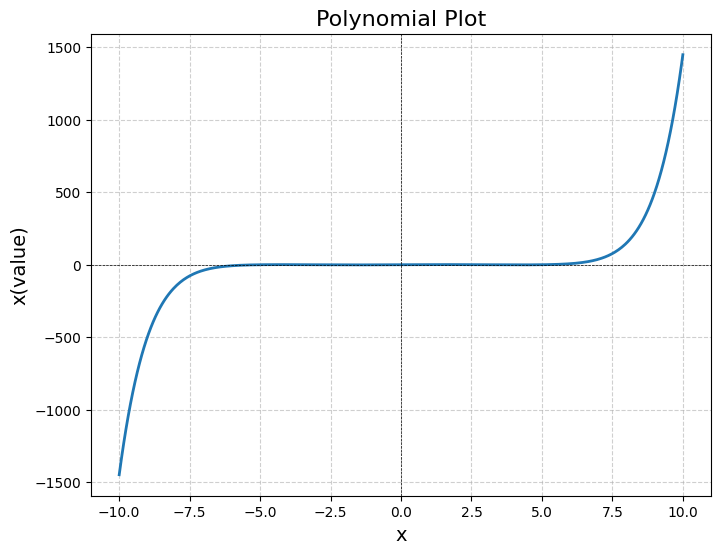

In [224]:
import matplotlib.pyplot as plt
import numpy as np

def plot_polynomial_from_coefficients(coefficients, variable_str='x', x_range=(-10, 10), num_points=500):
    """
    계수 리스트를 사용하여 대응되는 다항식을 그리고 플롯을 출력합니다.
    """
    # 심볼 정의
    x = sp.symbols(variable_str)
    
    # 다항식 생성
    polynomial = sum(c * x**i for i, c in enumerate(coefficients))
    
    # numpy 함수로 변환
    poly_func = sp.lambdify(x, polynomial, modules='numpy')
    
    # 그래프 범위 설정
    x_vals = np.linspace(x_range[0], x_range[1], num_points)
    y_vals = poly_func(x_vals)
    
    # 그래프 그리기
    plt.figure(figsize=(8, 6))
    plt.plot(x_vals, y_vals, label=str(polynomial), linewidth=2)
    plt.title("Polynomial Plot", fontsize=16)
    plt.xlabel(variable_str, fontsize=14)
    plt.ylabel(f'{variable_str}(value)', fontsize=14)
    plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
    plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

plot_polynomial_from_coefficients(coefficients)

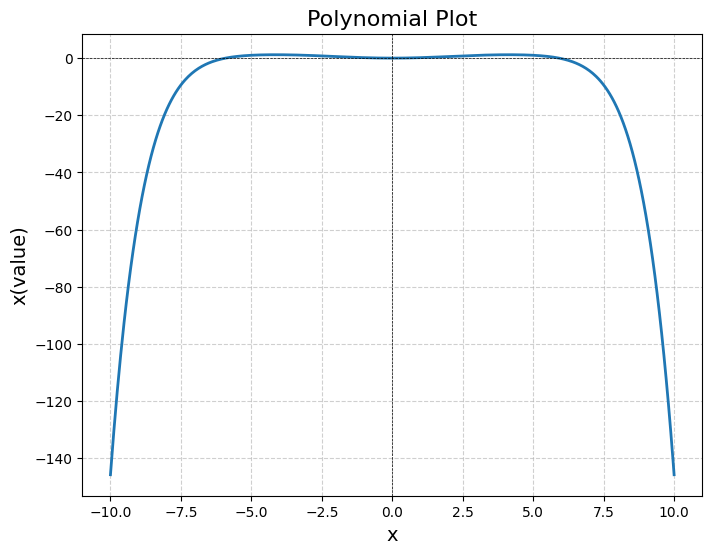

In [225]:
A = 1
for j in range(k,n_input):
    A*=math.cos(theta[j])
C = coefficients[k]/A
fd_coeff = []
for i in facted_fd_coeff:
    fd_coeff.append(C*i)
plot_polynomial_from_coefficients(fd_coeff)